<a href="https://colab.research.google.com/github/sapnabiradar/End-to-End/blob/main/airline_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv

In [ ]:
import math

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
numpy.random.seed(7)

In [ ]:
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 6s - loss: 0.0270 - 6s/epoch - 61ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0119 - 388ms/epoch - 4ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0099 - 358ms/epoch - 4ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0089 - 354ms/epoch - 4ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0078 - 487ms/epoch - 5ms/step
Epoch 6/100
94/94 - 1s - loss: 0.0071 - 602ms/epoch - 6ms/step
Epoch 7/100
94/94 - 1s - loss: 0.0060 - 509ms/epoch - 5ms/step
Epoch 8/100
94/94 - 1s - loss: 0.0053 - 657ms/epoch - 7ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0045 - 413ms/epoch - 4ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0039 - 198ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0034 - 347ms/epoch - 4ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0030 - 314ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0027 - 204ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0025 - 174ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0023 - 173ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0022 - 179ms/epoc

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 7ms/step


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.95 RMSE
Test Score: 51.74 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

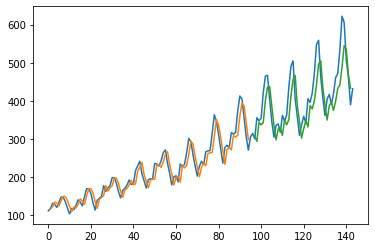

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()